# Regression discontinuity

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import patsy, warnings
import statsmodels.formula.api as smf, statsmodels.api as sm

from sklearn.linear_model import LinearRegression as lr ## Linear regression

warnings.filterwarnings('ignore')

## Figurewith 2D bins

In [2]:
data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/evaluation.dta")

cutoff = 58

data = data[data.treatment_locality == 1]
data['treatment'] = data.poverty_index <= cutoff
features = ["poverty_index", "health_expenditures", "treatment"]
data = data[features]
data.head()

,poverty_index,health_expenditures,treatment
0,55.950542,15.185455,True
1,55.950542,19.580902,True
2,46.058731,13.076257,True
3,46.058731,2.398854,True
4,54.095825,0.000000,True


In [3]:
data.sort_values("poverty_index", inplace=True)

data_treat = data[data.treatment == True]
data_crtl = data[data.treatment == False]

fmla = "health_expenditures ~ bs(poverty_index, df = 3)"

y, x = patsy.dmatrices(fmla, data_treat, return_type="dataframe")
y1, x1 = patsy.dmatrices(fmla, data_crtl, return_type="dataframe")

data_treat['yhat'] = np.concatenate(lr().fit(x, y).predict(x))
data_crtl['yhat'] = np.concatenate(lr().fit(x1, y1).predict(x1))

Text(0.5, 0, 'Baseline Poverty Index')

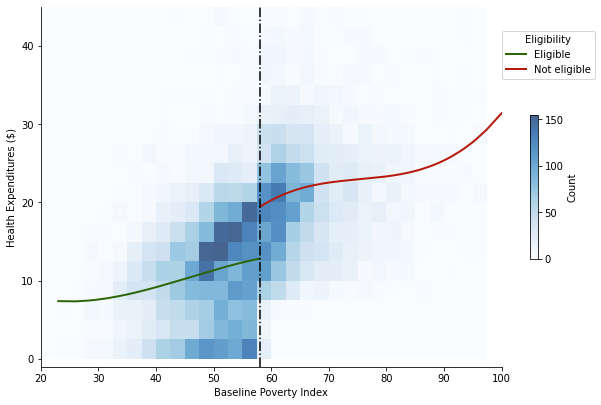

In [4]:
fig = plt.figure(figsize = (8, 5))
bins_xy = np.arange(0, 100, 2.5)

colors = ["#2c6609", "#b7190b"]

x, y = "porverty_index", "healt_expenditures"
ax = fig.add_axes([.1, 1, 1, 1])
plt.hist2d(
    "poverty_index", "health_expenditures", data = data
    , cmap = "Blues"
    , bins = (bins_xy, bins_xy)
    , alpha = .75
)
ax.plot("poverty_index", "yhat", data = data_treat, color = colors[0], label = "Eligible", lw = 2)
ax.plot("poverty_index", "yhat", data = data_crtl, color = colors[1], label = "Not eligible", lw = 2)
omit = ['right', 'top']

plt.colorbar(shrink = .4, label = "Count", ticks = np.arange(0, 151, 50))
ax.legend(title = "Eligibility", loc = (1, .8))
ax.set_ylim(-1, 45)
ax.axvline(cutoff, color = "black", linestyle = "-.", )
ax.set_xlim(20, 100)
ax.spines[omit].set_visible(False)
ax.set_ylabel("Health Expenditures ($)")
ax.set_xlabel("Baseline Poverty Index")

## Figure with Confidence Intervals

In [5]:
data2 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/RDD_data.dta")
cutoff = np.unique(data2.cutoff)[0]
# cutoff
data2['treatment'] = data2['pmt_score'] >= cutoff
data2['tmt_status'] = np.where(data2.tmt_status == "Control", 0, 1)
data2.sort_values('pmt_score', inplace = True)

In [6]:
data2_tr = data2[data2['treatment'] == True]
data2_cr = data2[data2['treatment'] == False]

fmla = "tmt_status ~ bs(pmt_score, 3)"

ytr, xtr = patsy.dmatrices(fmla, data = data2_tr, return_type = 'dataframe')
ycr, xcr = patsy.dmatrices(fmla, data = data2_cr, return_type = 'dataframe')

ols_tr = sm.OLS(ytr, xtr).fit()
data2_tr['yhat'] = ols_tr.predict(xtr)
data2_tr['upper'] = ols_tr.get_prediction().summary_frame()['mean_ci_upper']
data2_tr['lower'] = ols_tr.get_prediction().summary_frame()['mean_ci_lower']

ols_cr = sm.OLS(ycr, xcr).fit()
data2_cr['yhat'] = ols_cr.predict(xcr)
data2_cr['upper'] = ols_cr.get_prediction().summary_frame()['mean_ci_upper']
data2_cr['lower'] = ols_cr.get_prediction().summary_frame()['mean_ci_lower']

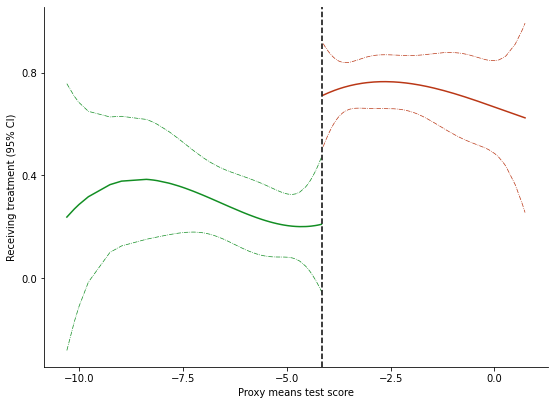

In [7]:
fig = plt.figure(figsize = (7, 5), facecolor = 'white')
ax = fig.add_axes([.1, 1, 1, 1])

colors = ["#ba3716", "#128e23"]

ax.plot('pmt_score', 'yhat', data = data2_tr, color = colors[0])
ax.plot('pmt_score', 'yhat', data = data2_cr, color = colors[1])
ax.plot('pmt_score', 'lower', data = data2_tr, linestyle = '-.', color = colors[0], lw = .7)
ax.plot('pmt_score', 'upper', data = data2_tr, linestyle = '-.', color = colors[0], lw = .7)
ax.plot('pmt_score', 'lower', data = data2_cr, linestyle = '-.', color = colors[1], lw = .7)
ax.plot('pmt_score', 'upper', data = data2_cr, linestyle = '-.', color = colors[1], lw = .7)

ax.axvline(cutoff, color = "black", lw = 1.5, linestyle = "--")
omit = ['right', 'top']
ax.spines[omit].set_visible(False)
ax.set_xlabel("Proxy means test score")
ax.set_ylabel("Receiving treatment (95% CI)")
ax.set_xticks(np.arange(-10, 1, 2.5))
ax.set_yticks(np.arange(0, .81, .4))

## Figure with Confidence Intervals and Points

In [8]:
## Using data2 
data2 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/RDD_data.dta")
cutoff = np.unique(data2.cutoff)[0]
# cutoff
data2['treatment'] = data2['pmt_score'] >= cutoff
data2['tmt_status'] = np.where(data2.tmt_status == "Control", 0, 1)
data2.sort_values('pmt_score', inplace = True)

data2_tr = data2[data2['treatment'] == True]
data2_cr = data2[data2['treatment'] == False]

fmla = "tmt_status ~ bs(pmt_score, 3)"

ytr, xtr = patsy.dmatrices(fmla, data = data2_tr, return_type = 'dataframe')
ycr, xcr = patsy.dmatrices(fmla, data = data2_cr, return_type = 'dataframe')

ols_tr = sm.OLS(ytr, xtr).fit()
data2_tr['yhat'] = ols_tr.predict(xtr)
data2_tr['upper'] = ols_tr.get_prediction().summary_frame()['mean_ci_upper']
data2_tr['lower'] = ols_tr.get_prediction().summary_frame()['mean_ci_lower']

ols_cr = sm.OLS(ycr, xcr).fit()
data2_cr['yhat'] = ols_cr.predict(xcr)
data2_cr['upper'] = ols_cr.get_prediction().summary_frame()['mean_ci_upper']
data2_cr['lower'] = ols_cr.get_prediction().summary_frame()['mean_ci_lower']

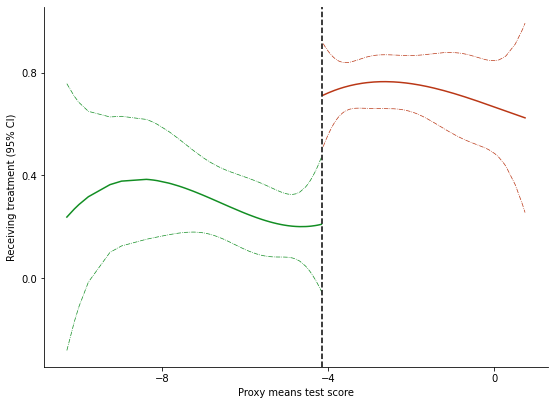

In [9]:
fig = plt.figure(figsize = (7, 5), facecolor = 'white')
ax = fig.add_axes([.1, 1, 1, 1])

colors = ["#ba3716", "#128e23"]

ax.plot('pmt_score', 'yhat', data = data2_tr, color = colors[0])
ax.plot('pmt_score', 'yhat', data = data2_cr, color = colors[1])
ax.plot('pmt_score', 'lower', data = data2_tr, linestyle = '-.', color = colors[0], lw = .7)
ax.plot('pmt_score', 'upper', data = data2_tr, linestyle = '-.', color = colors[0], lw = .7)
ax.plot('pmt_score', 'lower', data = data2_cr, linestyle = '-.', color = colors[1], lw = .7)
ax.plot('pmt_score', 'upper', data = data2_cr, linestyle = '-.', color = colors[1], lw = .7)

ax.axvline(cutoff, color = "black", lw = 1.5, linestyle = "--")
omit = ['right', 'top']
ax.spines[omit].set_visible(False)
ax.set_xlabel("Proxy means test score")
ax.set_ylabel("Receiving treatment (95% CI)")
ax.set_xticks(np.arange(-8, 1, 4))
ax.set_yticks(np.arange(0, .81, .4))


## Figure with Point estimate

In [10]:
data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/evaluation.dta")

cutoff = 58

data = data[data.treatment_locality == 1]
data['treatment'] = data.poverty_index <= cutoff
features = ["poverty_index", "health_expenditures", "treatment"]
data = data[features]


data.sort_values("poverty_index", inplace=True)

data_treat = data[data.treatment == True]
data_crtl = data[data.treatment == False]

fmla = "health_expenditures ~ bs(poverty_index, df = 3)"

y, x = patsy.dmatrices(fmla, data_treat, return_type="dataframe")
y1, x1 = patsy.dmatrices(fmla, data_crtl, return_type="dataframe")

data_treat['yhat'] = np.concatenate(lr().fit(x, y).predict(x))
data_crtl['yhat'] = np.concatenate(lr().fit(x1, y1).predict(x1))

Text(59, 19.46890236915037, '')

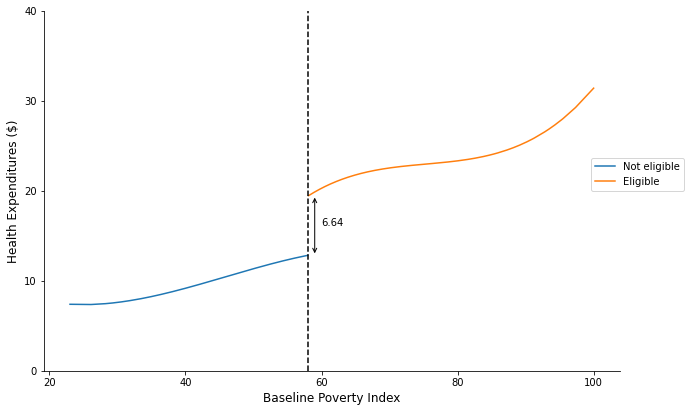

In [11]:
min_crtl = min(data_crtl.yhat)
max_treat = max(data_treat.yhat)
effect = np.round((min_crtl - max_treat), 2)
c = np.mean([min_crtl, max_treat])

fig = plt.figure(facecolor = 'white', figsize=(8, 5))
ax = fig.add_axes([.1, 1,1, 1])

ax.plot("poverty_index", "yhat", data = data_treat, label = "Not eligible")
ax.plot("poverty_index", "yhat", data = data_crtl, label = "Eligible")

omit = ['right', 'top']
ax.spines[omit].set_visible(False)
ax.set_ylim(0, 40)
ax.legend(loc = (.95, .5))
ax.axvline(cutoff, color = "black", linestyle = "--")
ax.set_xlabel("Baseline Poverty Index", size = 12)
ax.set_ylabel("Health Expenditures ($)", size = 12)
ax.set_yticks(np.arange(0, 41, 10))
ax.set_xticks(np.arange(20, 101, 20))
ax.annotate(f"{effect}", xy = (60, c))
ax.annotate("", xy = (59, max_treat), xytext = (59, min_crtl), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"))

## Figure with Confidence Intervals and Histograms

In [12]:
## Using data2 
data2 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/RDD_data.dta")
cutoff = np.unique(data2.cutoff)[0]
# cutoff
data2['treatment'] = data2['pmt_score'] >= cutoff
data2['tmt_status'] = np.where(data2.tmt_status == "Control", 0, 1)
data2.sort_values('pmt_score', inplace = True)

data2_tr = data2[data2['treatment'] == True]
data2_cr = data2[data2['treatment'] == False]

fmla = "tmt_status ~ bs(pmt_score, 3)"

ytr, xtr = patsy.dmatrices(fmla, data = data2_tr, return_type = 'dataframe')
ycr, xcr = patsy.dmatrices(fmla, data = data2_cr, return_type = 'dataframe')

ols_tr = sm.OLS(ytr, xtr).fit()
data2_tr['yhat'] = ols_tr.predict(xtr)
data2_tr['upper'] = ols_tr.get_prediction().summary_frame()['mean_ci_upper']
data2_tr['lower'] = ols_tr.get_prediction().summary_frame()['mean_ci_lower']

ols_cr = sm.OLS(ycr, xcr).fit()
data2_cr['yhat'] = ols_cr.predict(xcr)
data2_cr['upper'] = ols_cr.get_prediction().summary_frame()['mean_ci_upper']
data2_cr['lower'] = ols_cr.get_prediction().summary_frame()['mean_ci_lower']

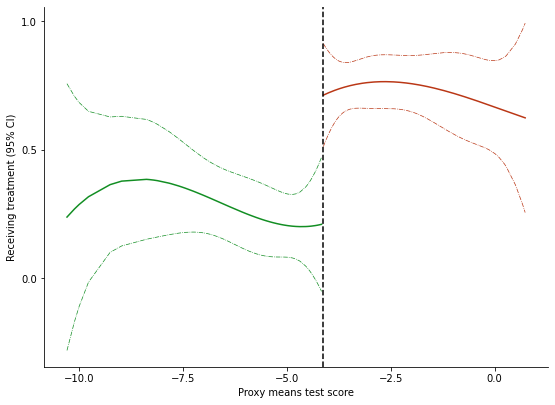

In [13]:
fig = plt.figure(figsize = (7, 5), facecolor = 'white')
ax = fig.add_axes([.1, 1, 1, 1])

colors = ["#ba3716", "#128e23"]

ax.plot('pmt_score', 'yhat', data = data2_tr, color = colors[0])
ax.plot('pmt_score', 'yhat', data = data2_cr, color = colors[1])
ax.plot('pmt_score', 'lower', data = data2_tr, linestyle = '-.', color = colors[0], lw = .7)
ax.plot('pmt_score', 'upper', data = data2_tr, linestyle = '-.', color = colors[0], lw = .7)
ax.plot('pmt_score', 'lower', data = data2_cr, linestyle = '-.', color = colors[1], lw = .7)
ax.plot('pmt_score', 'upper', data = data2_cr, linestyle = '-.', color = colors[1], lw = .7)

ax.axvline(cutoff, color = "black", lw = 1.5, linestyle = "--")
omit = ['right', 'top']
ax.spines[omit].set_visible(False)
ax.set_xlabel("Proxy means test score")
ax.set_ylabel("Receiving treatment (95% CI)")
ax.set_xticks(np.arange(-10, 1, 2.5))
ax.set_yticks(np.arange(0, 1.1, .5))

## Figure with Linear Fits and Local Linear Fits

In [14]:
## Using data2 
data2 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/RDD_data.dta")
cutoff = np.unique(data2.cutoff)[0]
# cutoff
data2['treatment'] = data2['pmt_score'] >= cutoff
data2['tmt_status'] = np.where(data2.tmt_status == "Control", 0, 1)
data2.sort_values('pmt_score', inplace = True)

data2_tr = data2[data2['treatment'] == True]
data2_cr = data2[data2['treatment'] == False]

fmla = "tmt_status ~ pmt_score"

ytr, xtr = patsy.dmatrices(fmla, data = data2_tr, return_type = 'dataframe')
ycr, xcr = patsy.dmatrices(fmla, data = data2_cr, return_type = 'dataframe')

ols_tr = sm.OLS(ytr, xtr).fit()
data2_tr['yhat'] = ols_tr.predict(xtr)
data2_tr['upper'] = ols_tr.get_prediction().summary_frame()['mean_ci_upper']
data2_tr['lower'] = ols_tr.get_prediction().summary_frame()['mean_ci_lower']

ols_cr = sm.OLS(ycr, xcr).fit()
data2_cr['yhat'] = ols_cr.predict(xcr)
data2_cr['upper'] = ols_cr.get_prediction().summary_frame()['mean_ci_upper']
data2_cr['lower'] = ols_cr.get_prediction().summary_frame()['mean_ci_lower']

In [15]:
fmla = "tmt_status ~ bs(pmt_score, 3)"

ytr, xtr = patsy.dmatrices(fmla, data = data2_tr, return_type = 'dataframe')
ycr, xcr = patsy.dmatrices(fmla, data = data2_cr, return_type = 'dataframe')

ols_tr = sm.OLS(ytr, xtr).fit()
data2_tr['yhat_3'] = ols_tr.predict(xtr)

ols_cr = sm.OLS(ycr, xcr).fit()
data2_cr['yhat_3'] = ols_cr.predict(xcr)

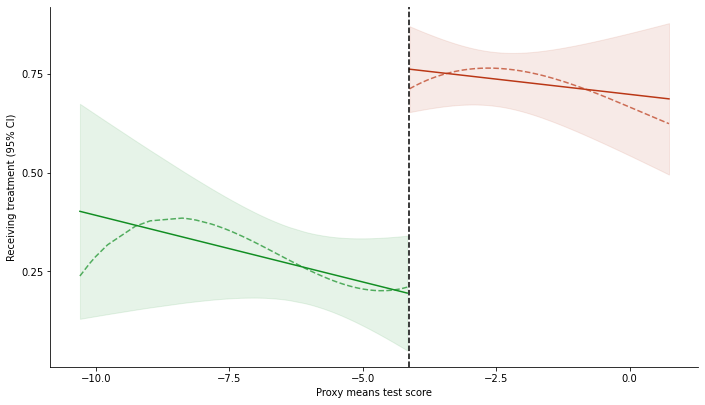

In [16]:
fig = plt.figure(figsize = (9, 5), facecolor = 'white')
ax = fig.add_axes([.1, 1, 1, 1])

colors = ["#ba3716", "#128e23"]

ax.plot('pmt_score', 'yhat', data = data2_tr, color = colors[0])
ax.plot('pmt_score', 'yhat', data = data2_cr, color = colors[1])

ax.plot('pmt_score', 'yhat_3', data = data2_tr, linestyle = "--", alpha = .7, lw = 1.5,  color = colors[0])
ax.plot('pmt_score', 'yhat_3', data = data2_cr, linestyle = "--", alpha = .7, lw = 1.5,  color = colors[1])

ax.fill_between('pmt_score', 'upper', 'lower', data = data2_tr, alpha = .1, color = colors[0])
ax.fill_between('pmt_score', 'upper', 'lower', data = data2_cr, alpha = .1, color = colors[1])

ax.axvline(cutoff, color = "black", lw = 1.5, linestyle = "--")
omit = ['right', 'top']
ax.spines[omit].set_visible(False)
ax.set_xlabel("Proxy means test score")
ax.set_ylabel("Receiving treatment (95% CI)")
ax.set_xticks(np.arange(-10, 1, 2.5))
ax.set_yticks(np.arange(0.25, .76, .25))

##  Figure with Points

In [17]:
data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/evaluation.dta")
cutoff = 58
data = data[data.treatment_locality == 1]
data['treatment'] = data.poverty_index <= cutoff
features = ["poverty_index", "health_expenditures", "treatment"]
data = data[features]
data.sort_values("poverty_index", inplace=True)
data_treat = data[data.treatment == True]
data_crtl = data[data.treatment == False]
fmla = "health_expenditures ~ bs(poverty_index, df = 3)"
y, x = patsy.dmatrices(fmla, data_treat, return_type="dataframe")
y1, x1 = patsy.dmatrices(fmla, data_crtl, return_type="dataframe")
data_treat['yhat'] = np.concatenate(lr().fit(x, y).predict(x))
data_crtl['yhat'] = np.concatenate(lr().fit(x1, y1).predict(x1))

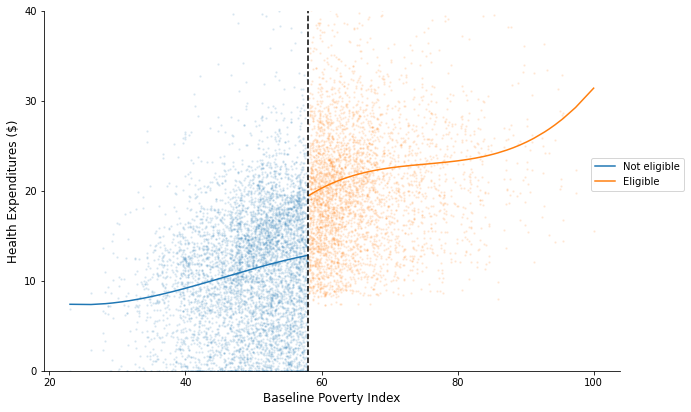

In [18]:
fig = plt.figure(facecolor = 'white', figsize=(8, 5))
ax = fig.add_axes([.1, 1,1, 1])

ax.plot("poverty_index", "yhat", data = data_treat, label = "Not eligible")
ax.plot("poverty_index", "yhat", data = data_crtl, label = "Eligible")

ax.scatter("poverty_index", "health_expenditures", s = 2, data = data_treat, alpha = .1, label = "")
ax.scatter("poverty_index", "health_expenditures", s = 2, data = data_crtl, alpha = .1, label = "")

omit = ['right', 'top']
ax.spines[omit].set_visible(False)
ax.set_ylim(0, 40)
ax.legend(loc = (.95, .5))
ax.axvline(cutoff, color = "black", linestyle = "--")
ax.set_xlabel("Baseline Poverty Index", size = 12)
ax.set_ylabel("Health Expenditures ($)", size = 12)
ax.set_yticks(np.arange(0, 41, 10))
ax.set_xticks(np.arange(20, 101, 20))